In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [131]:

netflow_df = pd.read_csv('netflow.csv')


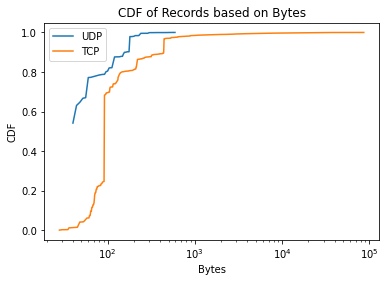

In [132]:
pdf = netflow_df.groupby("Protocol")['Bytes'].value_counts()

udp_cdf = pdf["UDP"].sort_index().cumsum() / pdf["UDP"].sort_index().sum()
tcp_cdf = pdf["TCP"].sort_index().cumsum() / pdf["TCP"].sort_index().sum()

plt.plot(tcp_cdf.index, tcp_cdf.values)
plt.plot(udp_cdf.index, udp_cdf.values)
plt.xlabel('Bytes')
plt.ylabel('CDF')
plt.title('CDF of Records based on Bytes')
plt.legend(["UDP", "TCP"])
plt.xscale('log')  # Set x-axis to log scale
plt.show()


# 1.1
My first observation is that nearly all packets are less than 1,000 bytes long. The second observation is that UDP packets tend to be smaller, and have no outliers larger than 1,000 bytes.

In [179]:
# Extract the first two octets of the source IP address
split_src_ids = netflow_df["Src IP addr"].apply(lambda x: x.split('.'))
netflow_df["src_ip_prefix"] = split_src_ids.apply(lambda x: '.'.join(x[0:2]))

# Group by the source IP prefix and count the number of flows
flows_per_src_prefix = netflow_df.groupby('src_ip_prefix')['Src IP addr'].count()
top_ten_src_flows = flows_per_src_prefix.sort_values()[-10:]
print(f"Top 10 src prefixes:\n", top_ten_src_flows)

# Get the top ten IP address prefixes and their percentage of all flows
percentage_src_flows = (top_ten_src_flows.sum() / flows_per_src_prefix.sum()) * 100
print(f"Top 10 src account for {percentage_src_flows:.2f}%")


# Group by percentage of bytes sent
# TODO: Need to group by bytes

Top 10 src prefixes:
 src_ip_prefix
184.105     1775
64.125      1852
212.83      2042
141.212     2143
94.23       2205
169.45      2494
163.53      2981
222.186     5269
169.54      9424
116.211    17019
Name: Src IP addr, dtype: int64
Top 10 src account for 44.80%


The top 10 src prefixes (as counted by flow) are reported above